In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
def plot_confusion_matrix(X, y, model):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()



In [3]:
df = pd.read_csv('./data/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Preparamos dataset X, y
X = df.drop("Class", axis=1)
y = df["Class"]

In [6]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

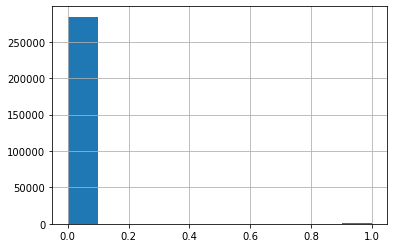

In [7]:
y.hist()

<AxesSubplot:>

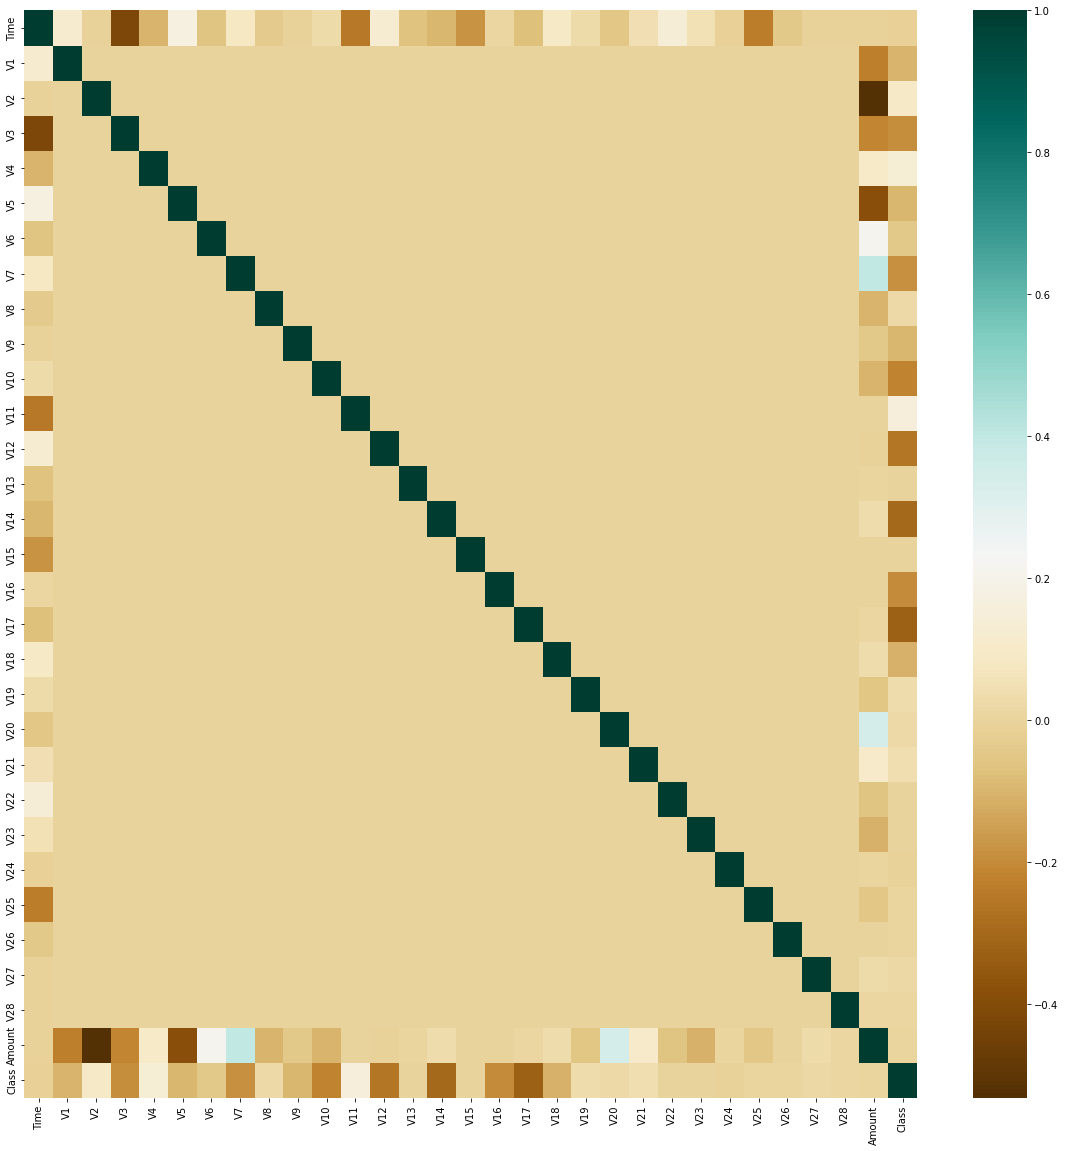

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Calculamos la matriz de correlacion
corr = df.corr()

# plot
plt.figure(figsize=(20, 20))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='BrBG')

In [10]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)

In [20]:
y_resampled.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [11]:
X_resampled.shape

(984, 30)

In [12]:
y_resampled.shape

(984,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.3, random_state=42)

In [14]:
# Sin bucle plantilla basica
def evaluate_model(X_train, y_train, X_test, y_test, model):
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")
    print("")
    print("")


    print("Training confusion matrix")
    plot_confusion_matrix(X_train, y_train, model)
    print("Test confusion matrix")
    plot_confusion_matrix(X_test, y_test, model)

Error training: 25.0 %
Error test: 38.17567567567568 %



Training confusion matrix


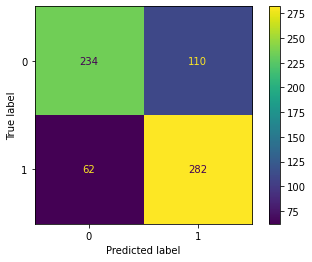

Test confusion matrix


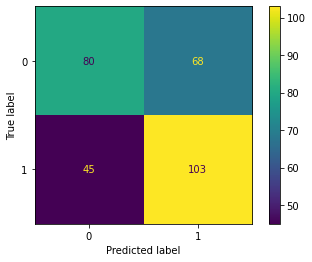

In [15]:
# KNN

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

Error training: 0.0 %
Error test: 1.6891891891891886 %



Training confusion matrix


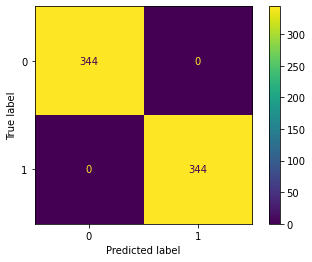

Test confusion matrix


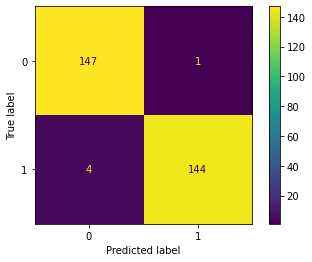

In [16]:
# Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
    max_depth=1, random_state=0)

model = model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

In [17]:
# Predict in original data:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

Error training: 55.73925081759996 %
Error test: 55.46387650246363 %



Training confusion matrix


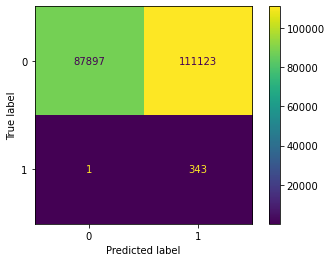

Test confusion matrix


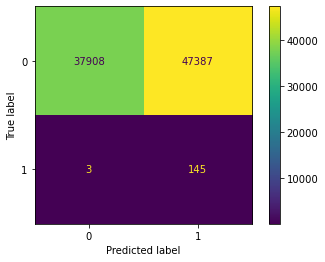

In [18]:
evaluate_model(X_train, y_train, X_test, y_test, model)

In [22]:
import pickle



In [21]:
model

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, random_state=0)

In [23]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression





# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 


In [24]:
# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [25]:
loaded_model

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, random_state=0)

In [27]:
result = loaded_model.score(X_test, y_test)
print(result)

0.4453612349753637


In [34]:
import json

In [35]:
json.dumps(X_test.iloc[0].to_dict())

'{"Time": 127294.0, "V1": -2.53733124088052, "V2": 1.89086398954169, "V3": -0.840554538789309, "V4": -1.10275857451177, "V5": -2.10572496501817, "V6": 0.367810823174649, "V7": -2.7378443184627, "V8": -3.54331388039951, "V9": -0.48314658550283, "V10": 0.112724082144171, "V11": -1.6125864643408, "V12": 0.635855271740596, "V13": 0.406871150414857, "V14": 0.854371268586897, "V15": 0.505753382304214, "V16": -0.947788092588628, "V17": 0.557331097060658, "V18": 1.54663826513625, "V19": -0.789047413329509, "V20": -1.95961124761461, "V21": 4.32816481557604, "V22": -2.16732949946179, "V23": 1.02256725061431, "V24": -0.241143274477121, "V25": -1.09488536686343, "V26": -0.475427437488543, "V27": -0.177157043721632, "V28": -0.0826905453531387, "Amount": 37.4}'

In [32]:
model.predict([X_test.iloc[0]])[0]

/Users/rafael.nogales/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


1

In [36]:
!pip list

Package                       Version
----------------------------- ------------
aiokafka                      0.8.0
alabaster                     0.7.12
alembic                       1.6.5
anaconda-client               1.9.0
anaconda-navigator            2.3.0
anaconda-project              0.10.2
aniso8601                     7.0.0
anyio                         3.5.0
appdirs                       1.4.4
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.9.0
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.2
asyncio                       3.4.3
attrs                         21.4.0
Automat                       20.2.0
b2b-forecasting-interface     0.2.1
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tem

In [ ]:
!pip list

data                finalized_model.pkl plantilla.ipynb
